# **Project : Analyzing the trends of COVID-19 with Python**


#Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.
#Dataset:
CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India. Download Link
#Guidelines:
● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.


In [1]:
# Importing required Libraries :-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Warnings

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset :

In [2]:
df=pd.read_csv("/content/covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


# Checking for Null values

In [4]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


# Dropping unnecessary ones :

In [5]:
# as removing the null values from "province/state" is not good idea as some null values consist data in other fields ,
# therefore removing the "province/state" columns itself.


df=df.drop(['Province/State'],axis=1)
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# Renaming Required :

In [6]:
# renaming the column "Country/Region" to country to make things simpler.


df=df.rename(columns={'Country/Region':'Country'})

# Duplicate Check :

In [7]:
# checking the duplicates

df.duplicated().sum()

0

# Let's see the top populated rows with max date :

In [8]:
top=df[df['Date']=='2020-07-27']

top.groupby(by='Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()


,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


# Seeing all confirmed cases in the dataset :

In [9]:
Confirmed=df.groupby(by='Date')['Confirmed'].sum().reset_index()
Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


# Visualize the above ones

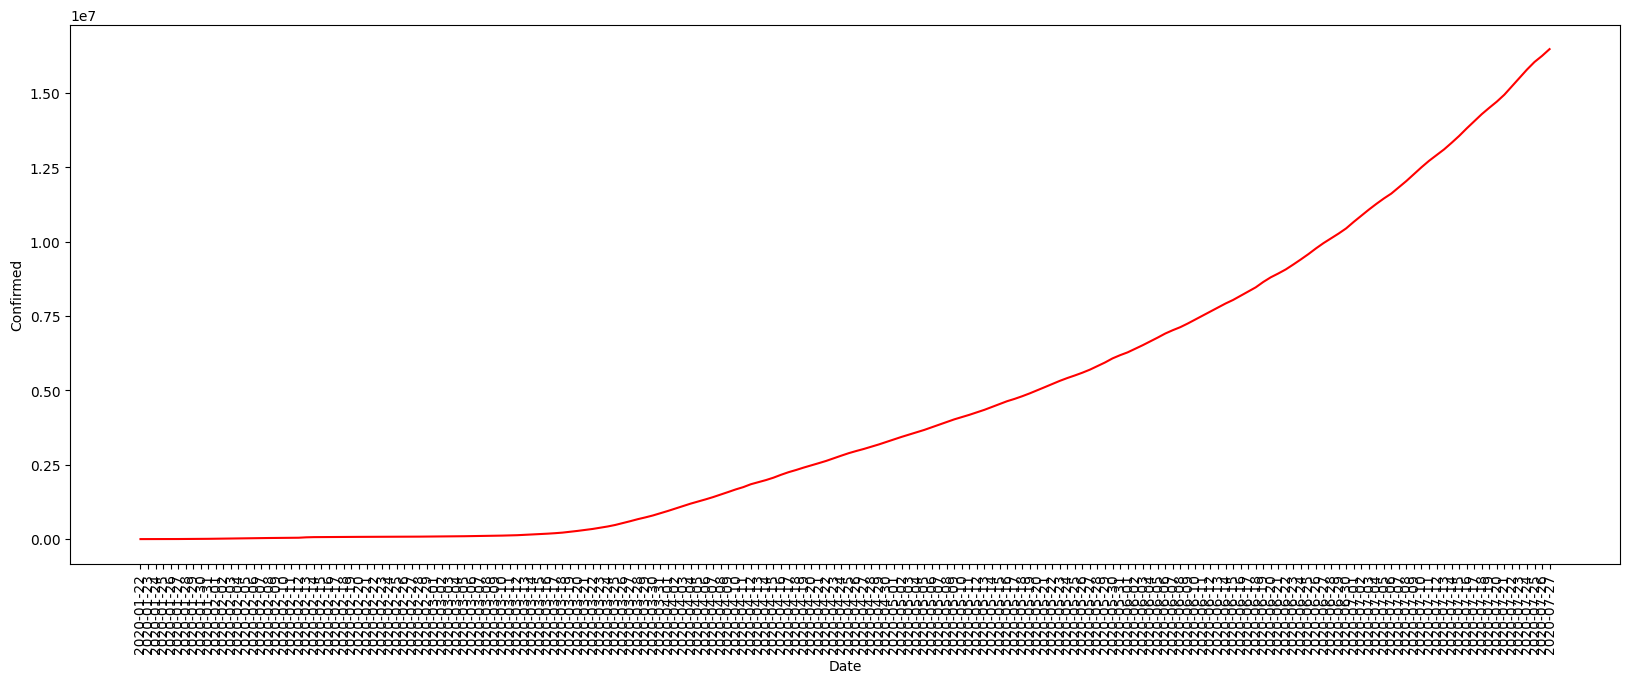

In [10]:
plt.figure(figsize=(20,7))
sns.lineplot(Confirmed,x='Date',y='Confirmed',color='Red')
plt.xticks(rotation=90)
plt.show()

# **Now let's find out the top 10 countries for recovered , deaths and active cases**

# 1. Recovered Cases for top 10

In [11]:
top_10_recovered=df.groupby(by='Country')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_recovered

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


# Visualize for top-10-recovered

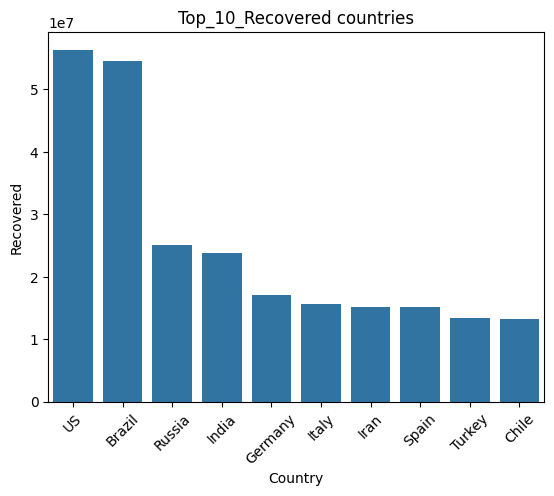

In [12]:
sns.barplot(data=top_10_recovered,x='Country',y='Recovered')
plt.title('Top_10_Recovered countries')
plt.xticks(rotation=45)
plt.show()

# 2. Deaths Cases for Top-10 :

In [13]:
top_10_deaths=df.groupby(by='Country')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_deaths

,Country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


# Visualize the above ones :

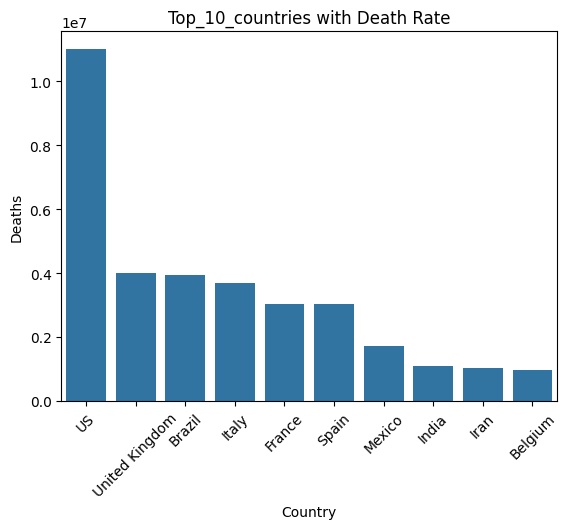

In [14]:
sns.barplot(data=top_10_deaths,x='Country',y='Deaths')
plt.title("Top_10_countries with Death Rate")
plt.xticks(rotation=45)
plt.show()

# 3. Active Cases for Top-10 :

In [15]:
top_10_active=df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


# Visualize the above ones :

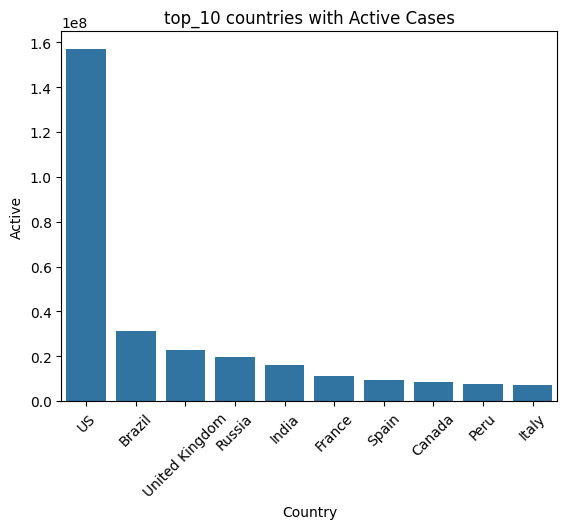

In [16]:
sns.barplot(data=top_10_active,x='Country',y='Active')
plt.title("top_10 countries with Active Cases")
plt.xticks(rotation=45)
plt.show()

# **Let us see the top 3 countries US , China & India specifically for Confirmed , Death and Recovered cases.**

In [17]:
US=df[(df['Country']=="US")]
China=df[df['Country']=='China']
India=df[df['Country']=="India"]

# Confirmed Data :

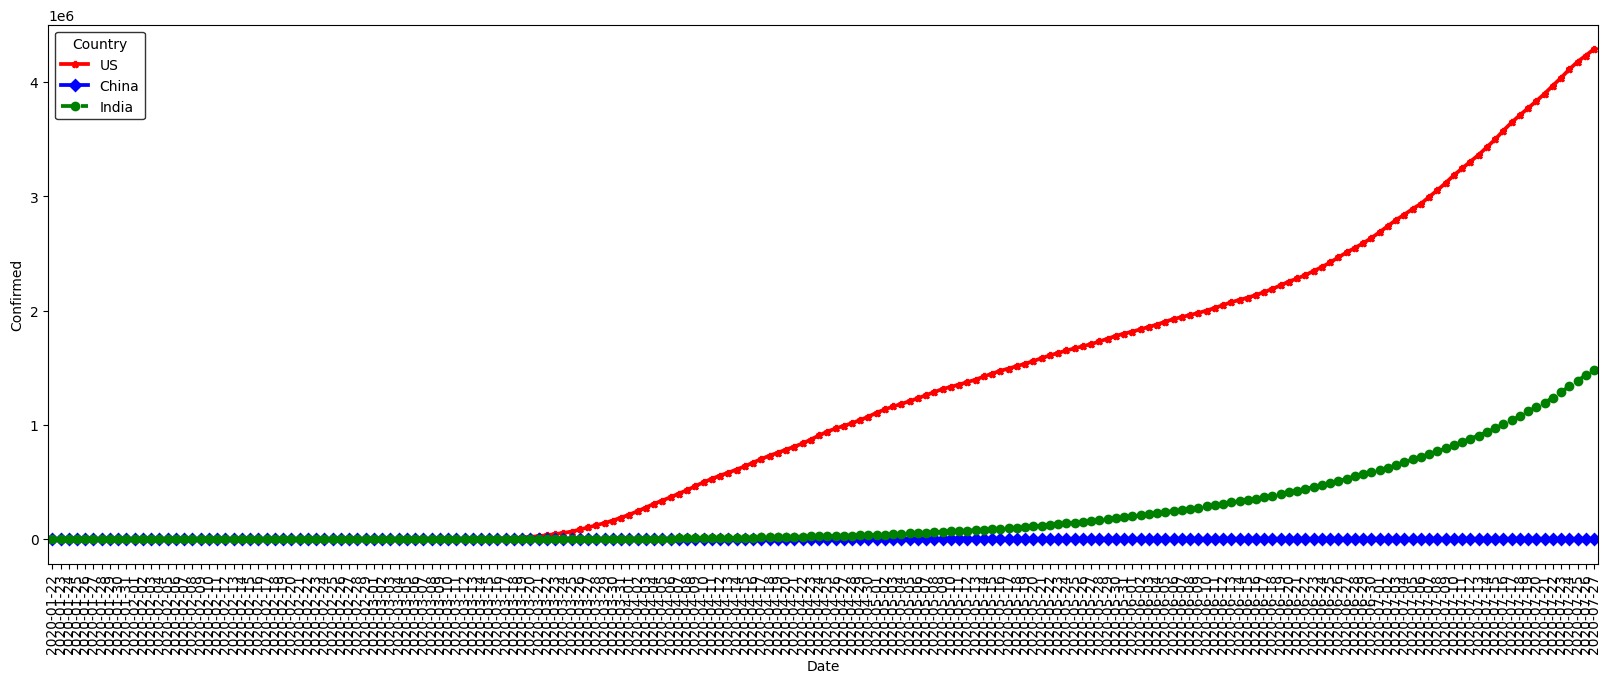

In [18]:
US_confirmed=pd.DataFrame(US,columns=['Date','Confirmed'])            # RED
China_confirmed=pd.DataFrame(China,columns=['Date','Confirmed'])      # BLUE
India_confirmed=pd.DataFrame(India,columns=['Date','Confirmed'])      # GREEN

# plotting the confirmed cases in these 3 countries

plt.figure(figsize=(20,7))
sns.pointplot(data=US_confirmed,x='Date',y='Confirmed',color='red',label='US',marker='*',markersize=5)
sns.pointplot(data=China_confirmed,x='Date',y='Confirmed',color='blue',label="China",marker='D',markersize=5)
sns.pointplot(data=India_confirmed,x='Date',y='Confirmed',color='green',linestyle='--',label="India",marker='o',markersize=5)
plt.legend(title='Country',loc='best',edgecolor='black')
plt.xticks(rotation=90)
plt.show()

# Insights:

* US has more confirmed cases with increase of time.

* India has increase in cases but not more than US.

* China maintained a constant, while no increase in cases with time.

# Deaths Data :

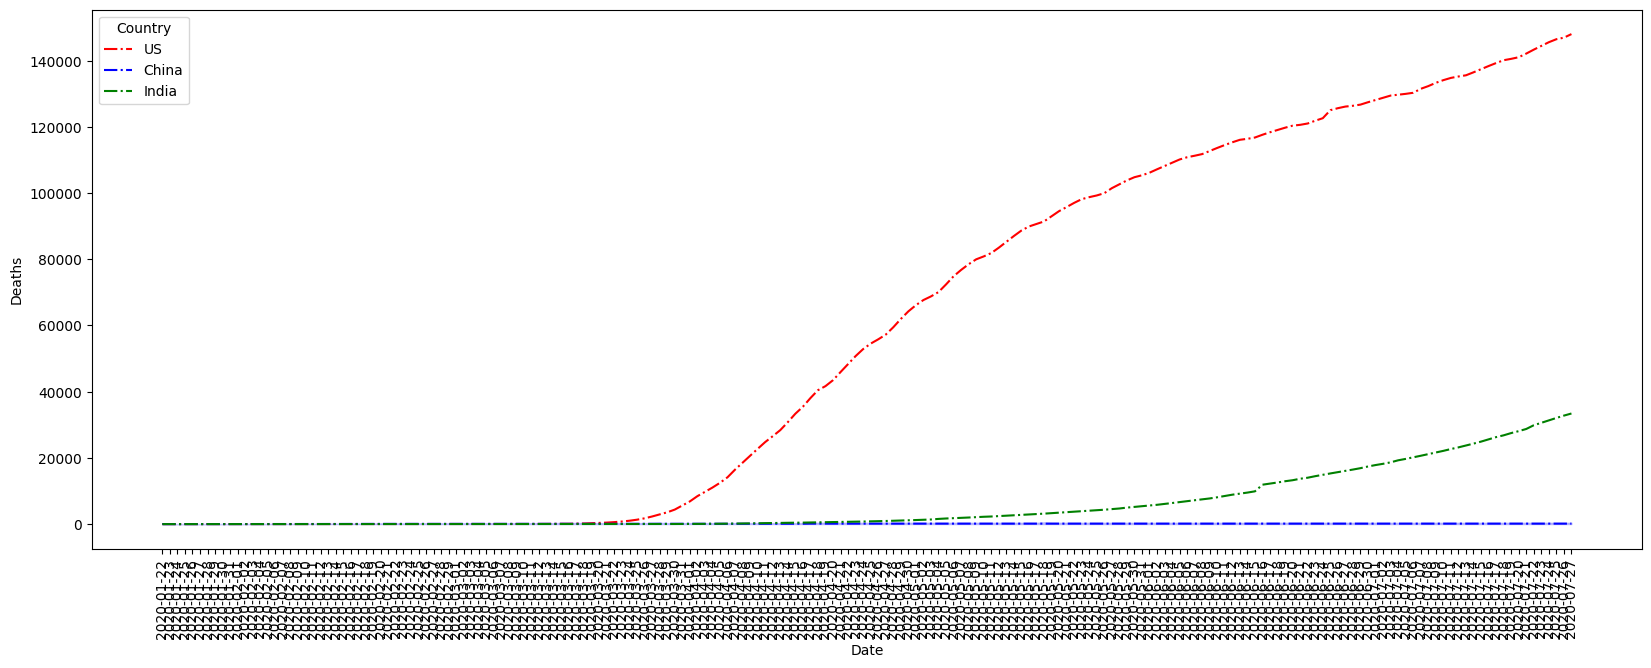

In [19]:
US_death=pd.DataFrame(US,columns=['Date','Deaths'])            # RED
China_death=pd.DataFrame(China,columns=['Date','Deaths'])         # BLUE
India_death=pd.DataFrame(India,columns=['Date','Deaths'])         # GREEN

# plotting the deaths data of these 3 countries
plt.figure(figsize=(20,7))
sns.lineplot(US_death,x='Date',y='Deaths',color='red',linestyle='-.',label='US')
sns.lineplot(China_death,x='Date',y='Deaths',color='blue',linestyle='-.',label='China')
sns.lineplot(India_death,x='Date',y='Deaths',color='green',linestyle='-.',label='India')
plt.legend(title='Country',loc='best')
plt.xticks(rotation=90)
plt.show()

# Insights:

* US have high Death rate over the time.
* India have less death rate as compare to US.
* China have a constant , death rate as of same we have seen in confirmed cases .

# Recovered Data :

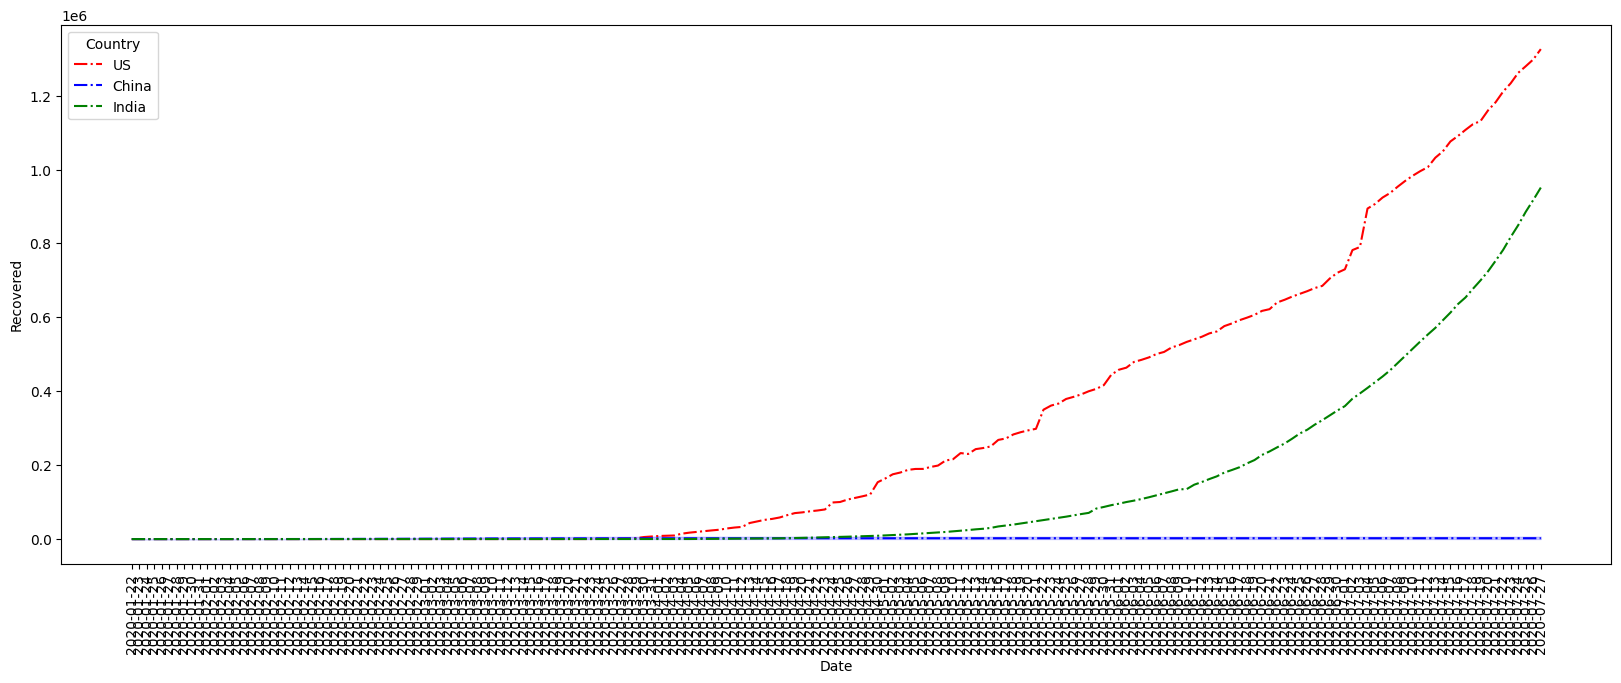

In [20]:
US_recovered=pd.DataFrame(US,columns=['Date','Recovered'])            # RED
China_recovered=pd.DataFrame(China,columns=['Date','Recovered'])         # BLUE
India_recoverd=pd.DataFrame(India,columns=['Date','Recovered'])         # GREEN


# plotting the recovered data of these 3 countries
plt.figure(figsize=(20,7))
sns.lineplot(US_recovered,x='Date',y='Recovered',color='red',linestyle='-.',label='US')
sns.lineplot(China_recovered,x='Date',y='Recovered',color='blue',linestyle='-.',label='China')
sns.lineplot(India_recoverd,x='Date',y='Recovered',color='green',linestyle='-.',label='India')
plt.legend(title='Country',loc='best')
plt.xticks(rotation=90)
plt.show()


# Insights:

* US and India have recovery rate.
* no recovery rate in China.

# Active Cases :

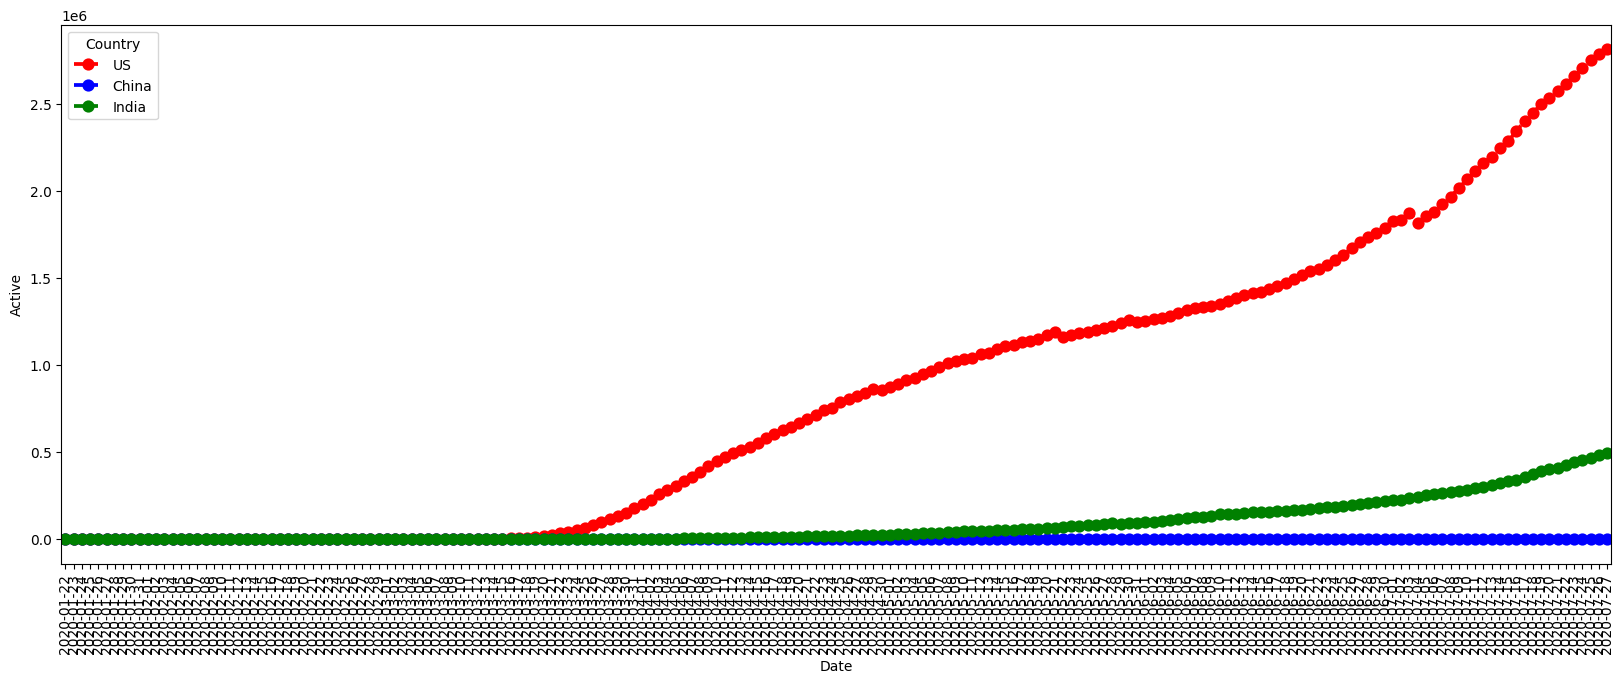

In [21]:
US_active=pd.DataFrame(US,columns=['Date','Active'])            # RED
China_active=pd.DataFrame(China,columns=['Date','Active'])         # BLUE
India_active=pd.DataFrame(India,columns=['Date','Active'])         # GREEN

# plotting the active data of these three countries : -

plt.figure(figsize=(20,7))
sns.pointplot(US_active,x='Date',y='Active',color='red',linestyle='-.',label='US')
sns.pointplot(China_active,x='Date',y='Active',color='blue',linestyle='-.',label='China')
sns.pointplot(India_active,x='Date',y='Active',color='green',linestyle='-.',label='India')
plt.legend(title='Country',loc='best')
plt.xticks(rotation=90)
plt.show()

# Insights:

* US have highest no. of active cases.

* India have less active cases as compared to US.

* China is constant, as no activity on the China data.

# **Let's Forecast for next 7 Days for every category of cases**

# loading dataset again: -

In [22]:
data=pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
# parse_date will change the Date columns to date_time datatype

data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


# creating different Datasets for predictions

In [24]:
# creating new dataset for "confirmed"

confirmed=data.groupby(by='Date').sum()['Confirmed'].reset_index()

# creating new dataset for "recovered"

recovered=data.groupby(by='Date').sum()['Recovered'].reset_index()

# creating new dataset for "Deaths"

deaths=data.groupby(by='Date').sum()['Deaths'].reset_index()

# creating new dataset for "Active"

active=data.groupby(by='Date').sum()['Active'].reset_index()

# 1. Let us Forecast for "Confirmed Cases" :

In [25]:
# renaming the columns of confirmed dataset

confirmed.columns=['ds','y']

confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


# installing Prophet

In [26]:
!pip install prophet

In [27]:
# importing Libararies :-

from prophet import Prophet

In [28]:
model = Prophet()

In [29]:
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/tws6u5mw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/2_t5zr4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65735', 'data', 'file=/tmp/tmps_uxxxnb/tws6u5mw.json', 'init=/tmp/tmps_uxxxnb/2_t5zr4v.json', 'output', 'file=/tmp/tmps_uxxxnb/prophet_modelp_5u9yt9/prophet_model-20250210154144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future=model.make_future_dataframe(periods=7,freq='D')

# forecasting :

In [31]:
forecast=model.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(7)  #predicted

,ds,yhat,yhat_upper,yhat_lower
188,2020-07-28,1.632020e+07,1.642518e+07,1.622246e+07
189,2020-07-29,1.652997e+07,1.664134e+07,1.642631e+07
190,2020-07-30,1.674391e+07,1.684807e+07,1.663659e+07
191,2020-07-31,1.695910e+07,1.707051e+07,1.685883e+07
192,2020-08-01,1.716676e+07,1.727246e+07,1.705032e+07
193,2020-08-02,1.736430e+07,1.747850e+07,1.725136e+07
194,2020-08-03,1.755889e+07,1.767665e+07,1.744445e+07


# Visualize

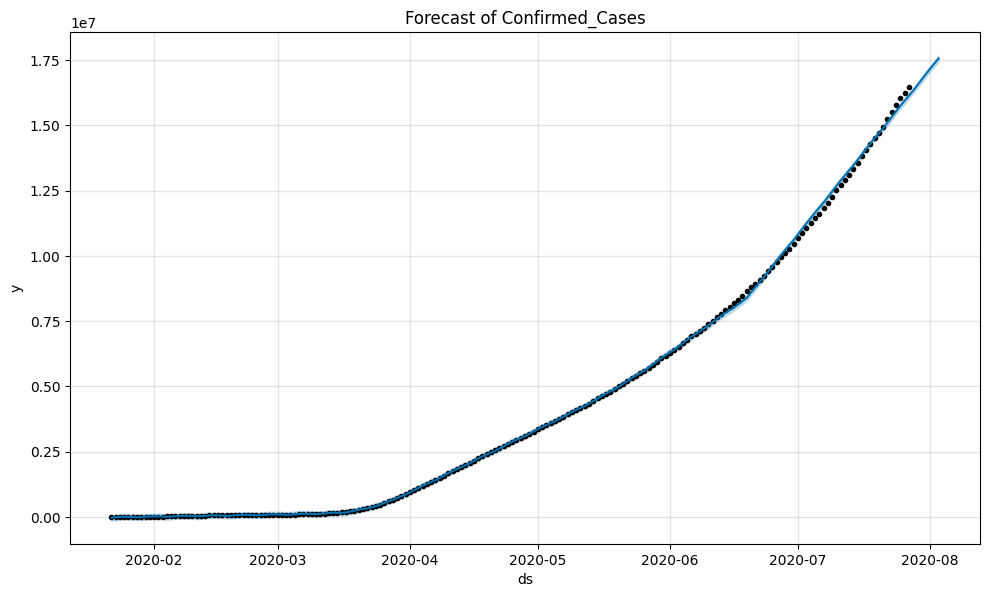

In [32]:
model.plot(forecast)
plt.title("Forecast of Confirmed_Cases")
plt.show()

# Insights:

* "dots" shows the datapoints or the values of the dataset(confirmed).
* 'extended blue line' shows the predicted values for 7 days.

# 2. Let's Forecast for Recovered Cases

In [33]:
# renaming the columns of recovered dataset

recovered.columns=['ds','y']

recovered.head()

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


# Model & Forecast

In [34]:
model01=Prophet()
model01.fit(recovered)

future01=model01.make_future_dataframe(periods=7,freq='D')

forecast01=model01.predict(future01)
forecast01[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/kb7qkemc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/3l1nbb4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8333', 'data', 'file=/tmp/tmps_uxxxnb/kb7qkemc.json', 'init=/tmp/tmps_uxxxnb/3l1nbb4h.json', 'output', 'file=/tmp/tmps_uxxxnb/prophet_modeltaybwq1j/prophet_model-20250210154144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_upper,yhat_lower
188,2020-07-28,9.311028e+06,9.390309e+06,9.228716e+06
189,2020-07-29,9.453130e+06,9.536382e+06,9.373701e+06
190,2020-07-30,9.595783e+06,9.672146e+06,9.514821e+06
191,2020-07-31,9.737182e+06,9.815398e+06,9.653785e+06
192,2020-08-01,9.877343e+06,9.958492e+06,9.791936e+06
193,2020-08-02,1.000332e+07,1.008385e+07,9.925972e+06
194,2020-08-03,1.013982e+07,1.022406e+07,1.005070e+07


# visualize

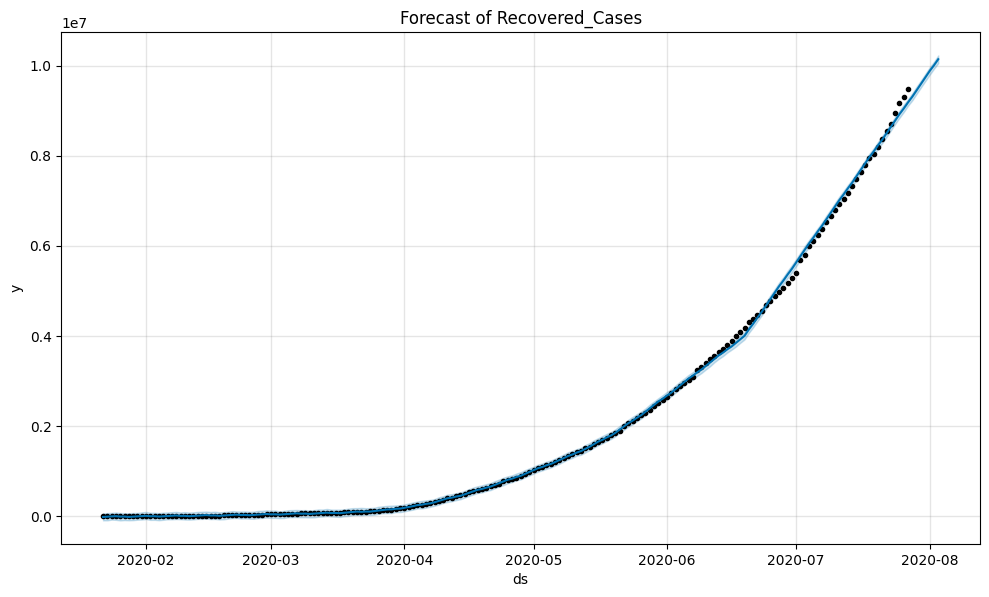

In [35]:
model01.plot(forecast01)
plt.title("Forecast of Recovered_Cases")
plt.show()

# Insights:

* "dots" shows the datapoints or the values of the dataset(recovered).
* 'extended blue line' shows the predicted values for 7 days.

# 3. Let's Forecast for Death Cases

In [36]:
# renaming for columns of dataset deaths

deaths.columns=['ds','y']
deaths.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


# Model and Forecast

In [37]:
model02=Prophet()
model02.fit(deaths)

future02=model02.make_future_dataframe(periods=7,freq='D')

forecast02=model02.predict(future02)
forecast02[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/ata5kula.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/eg4aykd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80303', 'data', 'file=/tmp/tmps_uxxxnb/ata5kula.json', 'init=/tmp/tmps_uxxxnb/eg4aykd7.json', 'output', 'file=/tmp/tmps_uxxxnb/prophet_model2decfbp5/prophet_model-20250210154145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_upper,yhat_lower
188,2020-07-28,652315.566446,654348.123511,650376.582791
189,2020-07-29,657882.129102,659872.548798,655894.373983
190,2020-07-30,663491.395651,665595.952383,661556.033488
191,2020-07-31,669006.394312,671355.204826,666679.126665
192,2020-08-01,673888.426957,676224.288727,671418.483152
193,2020-08-02,678025.345020,680601.953357,675274.456833
194,2020-08-03,682315.659400,685438.480863,679143.967911


# Visualize

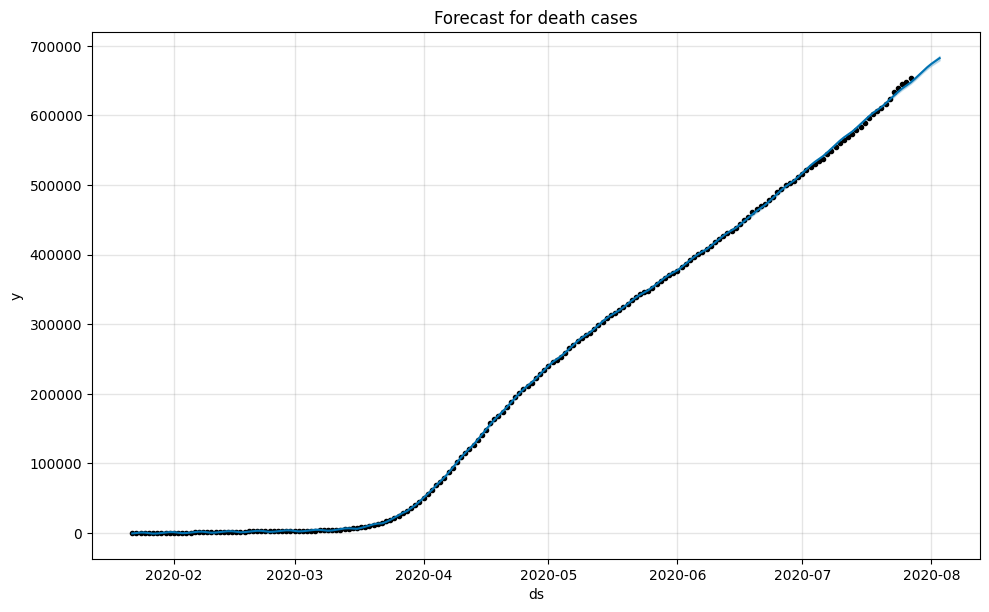

In [38]:
model02.plot(forecast02)
plt.title("Forecast for death cases")
plt.show()

# Insights:

* "dots" shows the datapoints or the values of the dataset(deaths).
* 'extended blue line' shows the predicted values for 7 days.

# 4. Let's Forecast for the Active Cases :

In [39]:
# renaming the columns of Active dataset

active.columns=['ds','y']
active.head()

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


# Model and Forecast

In [40]:
model03=Prophet()
model03.fit(active)

future03=model03.make_future_dataframe(periods=7,freq='D')

forecast03=model03.predict(future03)
forecast03[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/fiww3zz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_uxxxnb/70qykrtf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46379', 'data', 'file=/tmp/tmps_uxxxnb/fiww3zz8.json', 'init=/tmp/tmps_uxxxnb/70qykrtf.json', 'output', 'file=/tmp/tmps_uxxxnb/prophet_modelhlzzxdmx/prophet_model-20250210154146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_upper,yhat_lower
188,2020-07-28,6.353415e+06,6.395494e+06,6.303882e+06
189,2020-07-29,6.415815e+06,6.460312e+06,6.367616e+06
190,2020-07-30,6.481274e+06,6.529602e+06,6.436364e+06
191,2020-07-31,6.549315e+06,6.596535e+06,6.502030e+06
192,2020-08-01,6.611480e+06,6.660508e+06,6.563287e+06
193,2020-08-02,6.678771e+06,6.728517e+06,6.629745e+06
194,2020-08-03,6.732521e+06,6.784935e+06,6.680313e+06


# Visualize

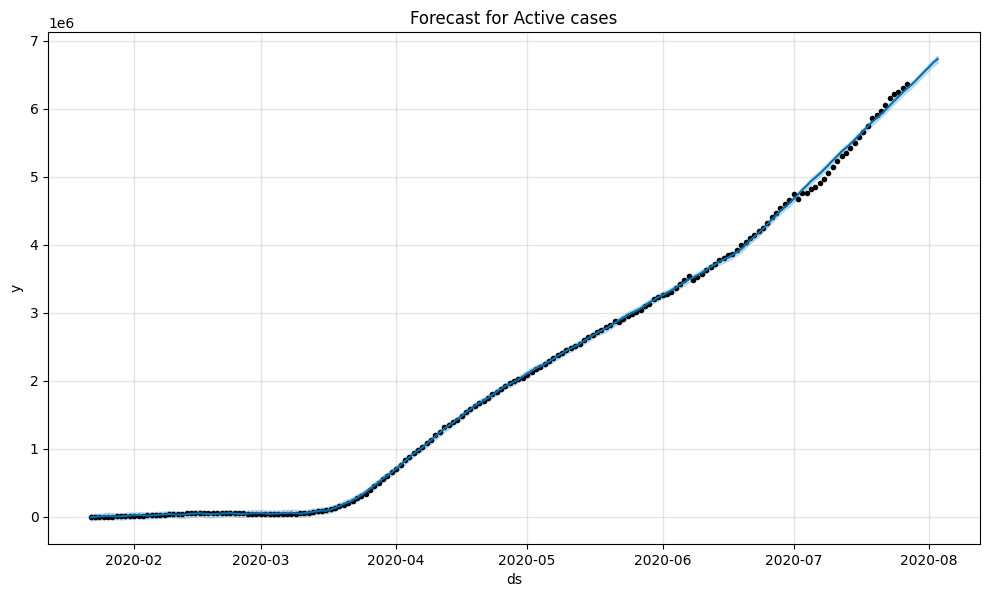

In [41]:
model03.plot(forecast03)
plt.title("Forecast for Active cases")
plt.show()

# Insights:

* "dots" shows the datapoints or the values of the dataset(active).
* 'extended blue line' shows the predicted values for 7 days.

# **Creating the World Map using Plotly.**

In [42]:
import plotly
import plotly.express as px

In [43]:
world=df.groupby(by='Country')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world.shape

(187, 5)

# 1. World Map Visual for Active Cases.

In [44]:
figure_active = px.choropleth(world,locations='Country',
                       locationmode='country names',
                       color='Active',
                       hover_name='Country',range_color=[1,20000],
                       color_continuous_scale='Rainbow',
                       title='Countries with Active Cases')
figure_active.show()

# 2. World Map for Recovered Cases.

In [45]:
figure_recovered = px.choropleth(world,locations='Country',
                       locationmode='country names',
                       color='Recovered',
                       hover_name='Country',range_color=[1,20000],
                       color_continuous_scale='Darkmint',
                       title='Countries with Recovered Cases')
figure_recovered.show()

# 3. World Map for Confirmed Cases.

In [46]:
figure_confirmed = px.choropleth(world,locations='Country',
                       locationmode='country names',
                       color='Confirmed',
                       hover_name='Country',range_color=[1,20000],
                       color_continuous_scale='Agsunset',
                       title='Countries with Confirmed Cases')
figure_confirmed.show()

# 4. World Map for Deaths Cases.

In [47]:
figure_deaths = px.choropleth(world,locations='Country',
                       locationmode='country names',
                       color='Deaths',
                       hover_name='Country',range_color=[1,20000],
                       color_continuous_scale='haline',
                       title='Countries with Deaths Cases')
figure_deaths.show()

# **The End Thanks**